1.Linear Regression

1) OLS regression

In [11]:
# Import data into dataframe
import pandas as pd
import statsmodels as stats
vis_df = pd.read_excel('data/lect02-lin-reg.xlsx', sheet_name='Viscosity', header=0)
vis_df.head()

,Temperature,Catalyst,Viscosity
0,80,8,2256
1,93,9,2340
2,100,10,2426
3,82,12,2293
4,90,11,2330


In [3]:
# Fit by using API
import statsmodels.api as sm

## y = B0<--[intercept] + Bxi.. + e <-- [error random] 
Y = vis_df.Viscosity
X = vis_df.drop('Viscosity', axis=1)
Xreg = sm.add_constant(X) #optional

print(Xreg)
print(Y)

vis_lm = sm.OLS(Y, Xreg).fit()
vis_lm.params #ดูว่า model นี้มี parameters มีอะไรบ้าง

    const  Temperature  Catalyst
0     1.0           80         8
1     1.0           93         9
2     1.0          100        10
3     1.0           82        12
4     1.0           90        11
5     1.0           99         8
6     1.0           81         8
7     1.0           96        10
8     1.0           94        12
9     1.0           93        11
10    1.0           97        13
11    1.0           95        11
12    1.0          100         8
13    1.0           85        12
14    1.0           86         9
15    1.0           87        12
0     2256
1     2340
2     2426
3     2293
4     2330
5     2368
6     2250
7     2409
8     2364
9     2379
10    2440
11    2364
12    2404
13    2317
14    2309
15    2328
Name: Viscosity, dtype: int64


C:\Users\2543b\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const          1566.077771
Temperature       7.621290
Catalyst          8.584846
dtype: float64

In [4]:
X

,Temperature,Catalyst
0,80,8
1,93,9
2,100,10
3,82,12
4,90,11
5,99,8
6,81,8
7,96,10
8,94,12
9,93,11


In [5]:
# Fit by using formula
from statsmodels.formula.api import ols

# Fit model with intercept(Beta0)
formula = 'Viscosity ~ Temperature + Catalyst' ## Response <-- parameter ใดๆ
# Fit model without intercept(Beta0)
#formula = 'Viscosity ~ Temperature + Catalyst - 1'

vis_lm = ols(formula, data=vis_df).fit()
vis_lm.params

Intercept      1566.077771
Temperature       7.621290
Catalyst          8.584846
dtype: float64

2) Making prediction

In [6]:
import numpy as np

Xk = X.iloc[[5],:]  # Get row 6 (as dataframe) --> 0 1 2 3 4 5
Xreg_k = sm.add_constant(Xk, has_constant='add') ## predict โดยมีค่า beta0 ร่วมด้วย ==> y^ = beta0 + beta1X6 + beta2X6 

Yk = np.array(vis_lm.predict(exog=Xreg_k)) ## exog เป็นตัวแปร parameter ที่เป็น independence [beta0 + beta1X6 + beta2X6]
Yk ## เป็นค่าที่ได้จากการทำนาย

## shift+tab double ดูตัวแปรว่าทำอะไรได้ในฟังก์ชั่นนั้นๆ 

C:\Users\2543b\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


array([2389.26425611])

3) Quality of fit

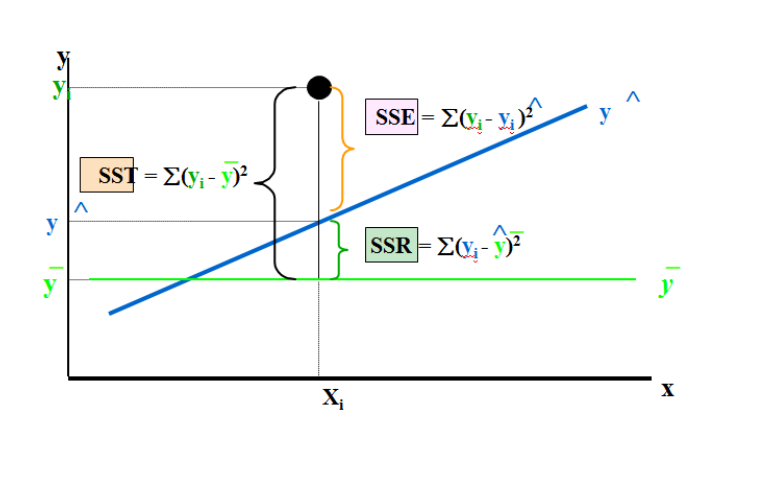

In [7]:
# Sum of Squares Residuals = sse (Sum of Squares Error)
# Unexplained variation in y
print("Sum of Squared Errors (SSE): {:.2f}".format(vis_lm.ssr)) # vis_lm.ssr Sum of Squares Residuals = SSE
                                                                # ความแปรปรวนในข้อมูลที่อธิบายไม่ได้
# Explained sum of squares = ssr (Sum of Squares Regression)
# Variation in y explained by regression model
print("Sum of Squared Regression (SSR): {:.2f}".format(vis_lm.ess)) #ค่าที่ทำนายต่างจากค่าจริงแค่ไหน

# Total sum of squares = sst (Sum of Squares Total)
print("Sum of Squared Total (SST): {:.2f}".format(vis_lm.centered_tss)) #ค่าจริงแต่ละตัวต่างจากค่าเฉลี่ยแค่ไหน

print("Residual df (n-p): {:.0f}".format(vis_lm.df_resid)) # degree of freedom
print("Mean Squared errors (MSE): {:.2f}".format(vis_lm.mse_resid)) # SSE / (n-p) 
print("Standard Errors (Se): {:.2f}".format(np.sqrt(vis_lm.mse_resid))) # sqrt(MSE)

Sum of Squared Errors (SSE): 3478.85
Sum of Squared Regression (SSR): 44157.09
Sum of Squared Total (SST): 47635.94
Residual df (n-p): 13
Mean Squared errors (MSE): 267.60
Standard Errors (Se): 16.36


R-squared and Adjusted R-squared

In [8]:
# Ratio SSR/SST 
print("R-squared: {:.3f}".format(vis_lm.rsquared))
#ร้อยละของความแปรปรวนในข้อมูลที่สุ่มมา ที่สามารถอธิบายได้ด้วยโมเดล

# Penalize the model with unnecessary parameters
print("Adjusted R-squared: {:.3f}".format(vis_lm.rsquared_adj)) #เป็นการดูว่ามี parameter ที่ไม่มีผลต่อการทำนายค่า y (response) หรือป่าว

R-squared: 0.927
Adjusted R-squared: 0.916


3) Statiatical Inference on fitted model (F-test)

In [10]:
# Overall F-test
# Significnace of Model
# Significance of regression coefficient
vis_lm.summary2()
# Overall F-test(Significnace of Model) reject H0 
# : มีค่า coefficient อย่างน้อย 1 ตัวที่ต่างจาก 0 อย่างมีนัยสำคัญ -> การใช้โมเดลทำนายค่า y ดีกว่าการใช้ค่าเฉลี่ย
# Significance of regression coefficient reject H0 : coefficient นั้นๆต่างจาก 0 อย่างมีนัยสำคัญ
# Prob(F-statistic) = p-value ของ F-test

C:\Users\2543b\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.916   
Dependent Variable: Viscosity        AIC:                137.5159
Date:               2021-09-30 10:45 BIC:                139.8337
No. Observations:   16               Log-Likelihood:     -65.758 
Df Model:           2                F-statistic:        82.50   
Df Residuals:       13               Prob (F-statistic): 4.10e-08
R-squared:          0.927            Scale:              267.60  
-----------------------------------------------------------------
              Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-----------------------------------------------------------------
Intercept   1566.0778  61.5918 25.4267 0.0000 1433.0167 1699.1388
Temperature    7.6213   0.6184 12.3236 0.0000    6.2853    8.9573
Catalyst       8.5848   2.4387  3.5203 0.0038    3.3164   13.8533
-----------------------------------------------------------------
Omnibus:               1.215        Durbin-Watson:          2.607
Prob(Omnibus):         0.545        Jarque-Bera (JB):       0.779
Skew:                  -0.004       Prob(JB):               0.677
Kurtosis:              1.919        Condition No.:          1385 
=================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [14]:
stats.f.isf(0.05,12,17) ## (alpha,dfmodel (m),dfresdiual (n-p) ) หา critical value
# วิธีหาว่า significant หรือไม่ โดยการดูจาก ค่า F0 > F-critical value --> significant หรือมีนัยสำคัญทางสถิติ ตามด้วยเหตุผล

2.3806541615770063

In [13]:
# Partial F-test
# First fit the reduced model
formula_reduced = 'Viscosity ~ Temperature'
vis_lm_reduced = ols(formula_reduced, data=vis_df).fit()

from scipy import stats
result = ((vis_lm_reduced.ssr - vis_lm.ssr)/1)/vis_lm.mse_resid ## --> [SSEreduce - SSEfullmodel]/จำนวนตัวแปรที่เราเอาออกไป/MSEfullmodel
n,p=30,5; stats.f.sf(result, 1, n-p) #หาค่า p-value ของ F-test
# reject Ho : มีตัวแปรที่เอาออกอย่างน้อย 1 ตัวมีค่า coefficient ต่างจาก 0 -> ตัวแปรที่เอาออกมีผลต่อการทำนายค่า response

0.00167789813800786

4) Coefficient Interpretation

<Figure size 432x288 with 0 Axes>

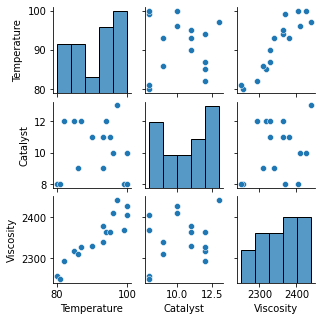

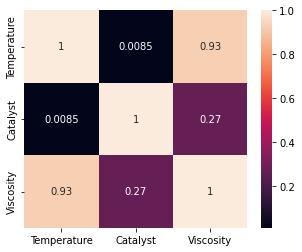

In [9]:
# the scatter diagram and correlation matrix
# ได้ค่าใกล้ 1 หรือ -1 คือตัวแปรมีความสัมพันธ์กันมาก
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(); 
sns.pairplot(vis_df,height=1.5, aspect=1); ## sns.pairplot(dataframe,ที่เหลือตามนั้น)

plt.figure(figsize=(5,4));
corr = vis_df.corr() #dataframe.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True);
pass;

Tips for Linear Regression

-Better fit model without intercept if intercept's p-value greater than typeI error(alpha)

-Most significant parameter is the parameter which has the smallest p-value

-If parameter is not significant, it'll be necessary to do correlation test with the significant one 
or remove one predictor (the significant of the other predictors under correlated will change)

5) One-Hot encoding(extra)

In [10]:
df = pd.DataFrame({'countries' : ['Spain', 'France', 'Germany', 'France', 'Spain'],
                  'values' : [100, 200, 400, 500, 600]})
df

,countries,values
0,Spain,100
1,France,200
2,Germany,400
3,France,500
4,Spain,600


In [11]:
x = pd.get_dummies(df.countries)
x

,France,Germany,Spain
0,0,0,1
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1


In [12]:
x['values'] = df['values']
x

,France,Germany,Spain,values
0,0,0,1,100
1,1,0,0,200
2,0,1,0,400
3,1,0,0,500
4,0,0,1,600


### 2.Single factor ANOVA

In [9]:
import pandas as pd
df = pd.read_excel('data/lect03-anova.xlsx', sheet_name='Apple1')
df

,Apple,n1,n2,n3,n4,n5
0,Apple1,0.35,0.4,0.58,0.50,0.47
1,Apple2,0.65,0.7,0.90,0.84,0.79
2,Apple3,0.60,0.8,0.75,0.73,0.66


In [10]:
phos_df = pd.melt(df, id_vars='Apple', value_vars=df.columns[1:],
                        value_name='Phosphorus').drop(columns=['variable'])
phos_df

,Apple,Phosphorus
0,Apple1,0.35
1,Apple2,0.65
2,Apple3,0.60
3,Apple1,0.40
4,Apple2,0.70
5,Apple3,0.80
6,Apple1,0.58
7,Apple2,0.90
8,Apple3,0.75
9,Apple1,0.50


In [15]:
from scipy import stats

# critical values of Chi-square distribution
stats.chi2.isf(0.05, 10) # (alpha, degree of freedom)

18.30703805327515

In [16]:
# p-values of Chi-square distribution
stats.chi2.sf(10, 2) # (test ststistics, degree of freedom)

0.006737946999085468

1) ANOVA F-test

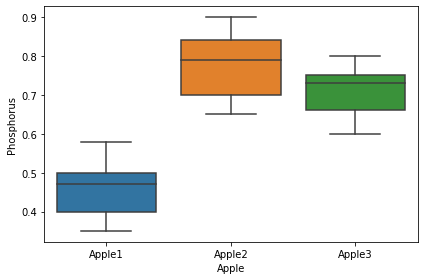

In [17]:
# box plot
from statsmodels.formula.api import ols # Require patsy version 5.0.1+
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(6,4));
sns.boxplot(x='Apple',y='Phosphorus',data=phos_df) #ดูคร่าวๆว่าค่า mean ในแต่ละกลุ่มแตกต่างกันไหมจากความยาวกล่องที่ ทับซ้อน (overlap) กัน
plt.tight_layout()
pass;

In [18]:
### Generate ANOVA table
# fit regression ก่อนแล้ว convert เป็น ANOVA table
phos_app_model = ols('Phosphorus ~ Apple', data=phos_df).fit()
df['resid'] = phos_app_model.resid
aov_table = sm.stats.anova_lm(phos_app_model, typ=1) 
aov_table 
# reject H0 : มีอย่างน้อย 1 treatment ที่แตกต่างจาก treatment อื่นๆ
## SSTr df SSR MSTr F p-value(F-test)
## SSE  df SSE  MSE - -

,df,sum_sq,mean_sq,F,PR(>F)
Apple,2.0,0.27664,0.13832,16.971779,0.000317
Residual,12.0,0.09780,0.00815,NaN,NaN


2) Residual diagnostics

In [19]:
def check_anova_normality(group, x): ###ใส่ group = treatment หลายๆอัน, ค่า residual (model.resid)  

    T = len(x)
    
    fig = plt.figure(figsize=(10,8))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    #ax1.plot(x, color='blue', alpha=0.5, linestyle='--', marker='o', ms=4)
    n=len(x)
    sns.residplot(np.linspace(1,n,n), x, color='blue', ax=ax1)
    ax1.set_title('Sequence plot')
    
    # Scatter plot
    #ax2.scatter(x, x.shift(), alpha=0.5, color='red')
    #ax2.set_title(r'Scatter plot of $e_n$ vs $e_{n+1}$')
    
    # Residual groupplot
    resid_df = pd.DataFrame({'Group':group, 'Resid':x})
    sns.stripplot(x='Group', y='Resid', data=resid_df, ax=ax2) 
    ax2.set_title('Residuals by treatments')
    
    # Box plot
    #ax2.boxplot(x,showmeans=True)
    #ax2.set_title('Boxplot')

    # histogram plot
    sns.distplot(x, hist=True, kde=True, ax=ax3)
    ax3.set_title('Histogram')

    # qq plot
    sm.graphics.qqplot(x,line='q',ax=ax4)
    ax4.set_title('Normal plot')
    plt.tight_layout()
    
# residuals ทุก treatment มีการกระจายตัวแบบ normal distribution 
# และมีค่า variance ใกล้เคียงกันเนื่องจากค่า residuals กระจายตัวอยู่ในช่วงใกล้เคียงกัน

C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot

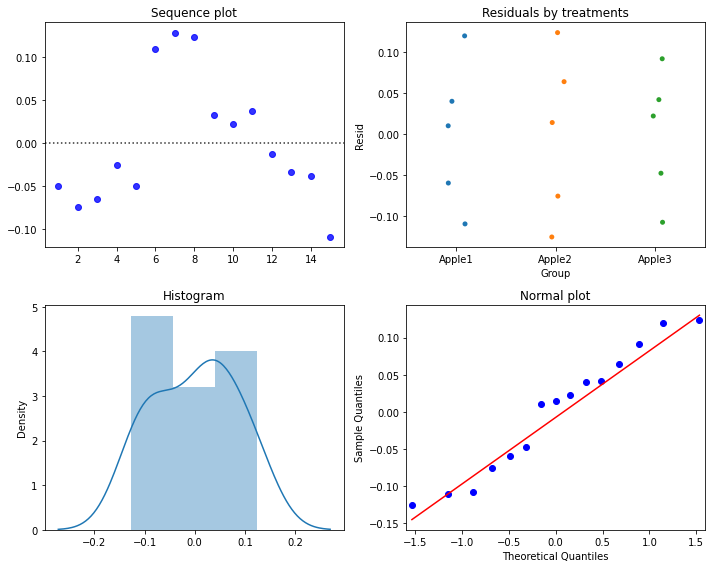

In [20]:
check_anova_normality(phos_df['Apple'], phos_app_model.resid)

# residuals ทุก treatment มีการกระจายตัวแบบ normal distribution 
# และมีค่า variance ใกล้เคียงกันเนื่องจากค่า residuals กระจายตัวอยู่ในช่วงใกล้เคียงกัน

3) Post-hoc Analysis

In [32]:
from statsmodels.stats.libqsturng import qsturng
q_crit = qsturng(1-0.05, 2, 10) # (1-alpha, a, a(n-1)) a=จำนวน treatments, จำนวนข้อมูลทั้งหมด - จำนวน treatments 
print("q-critical values of Apple data for Tukey's HSD test is ", q_crit)

q-critical values of Apple data for Tukey's HSD test is  3.1510641832992343


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Apple1 Apple2    0.316  0.001  0.1637 0.4683   True
Apple1 Apple3    0.248 0.0025  0.0957 0.4003   True
Apple2 Apple3   -0.068 0.4818 -0.2203 0.0843  False
---------------------------------------------------


C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


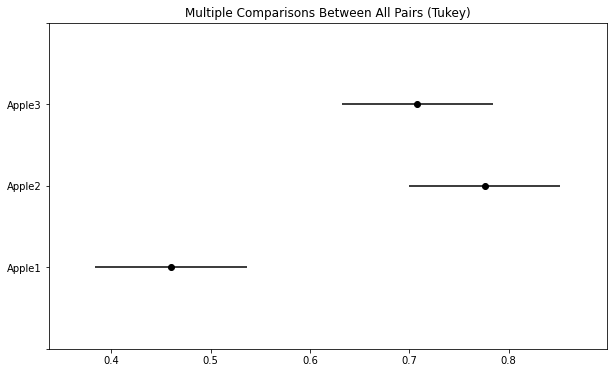

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# alpha = Family-wise error rate
result=pairwise_tukeyhsd(phos_df['Phosphorus'],phos_df['Apple'],alpha=0.05)
print(result)
result.plot_simultaneous();    # Plot confidence intervals of all sample means
#plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")
# reject H0 : treatment คู่นั้นค่าเฉลี่ย (mean) Mi=มิว แตกต่างกัน

4) Levene Test for variance equality

In [23]:
from scipy import stats

y1=[0.96,1.03,0.77,0.88,1.06,0.99,0.72,0.86,0.97,0.90] #y1 = apple1
y2=[0.82,0.68,1.08,0.76,0.83,0.74,0.77,0.85,0.79,0.71] #y2 = apple2
y3=[0.75,0.56,0.63,0.69,0.73,0.75,0.60,0.63,0.59,0.61] #y3 = apple3

# Test for homogeneity of variance
# H0 : all treatments have equal variance
# Ha : at least one treatment has different variance
f0,pval = stats.levene(y1, y2, y3); 
print("Levene's test statistic: {:.5f}, p-value: {:.5f}".format(f0,pval))
# Accept H0 = all treatments have equal variance

Levene's test statistic: 0.58608, p-value: 0.56343


5) Kruskal-Wallis test (CRD non parametric test)

เราจะใช้ในกรณีที่ แต่ละ treatment จำนวน sample ต่างกัน

In [20]:
from scipy import stats

x=[24, 16.7, 22.8, 19.8, 18.9]
y=[23.2, 19.8, 18.1, 17.6, 20.2, 17.8]
z=[18.4, 19.1,17.3, 17.3, 19.7,18.9,18.8,19.3]
result=stats.kruskal(x,y,z) 

print('F-statistic: {:.4f}'.format(result.statistic)) 
print('p-value: {:.4f}'.format(result.pvalue))
# reject H0 : มีอย่างน้อย 1 treatment ที่แตกต่างจาก treatment อื่นๆ ไว้หารวมๆ

F-statistic: 1.6630
p-value: 0.4354


6) Bonferroni joint C.I. (CRD non parametric test)

ใช้ในการหาว่า treatment แต่ละมีคู่มีค่า rank-mean แตกต่างกันหรือป้าว

In [21]:
missile_data = pd.DataFrame({'system1': [24, 16.7, 22.8, 19.8, 18.9, None, None, None], #ตัวไหนไม่มีใส่ None นะพี่ อย่าปล่อยว่างนา
                         'system2': [23.2, 19.8, 18.1, 17.6, 20.2, 17.8, None, None],
                         'system3': [18.4, 19.1, 17.3, 17.3, 19.7, 18.9, 18.8, 19.3]})
missile_data

,system1,system2,system3
0,24.0,23.2,18.4
1,16.7,19.8,19.1
2,22.8,18.1,17.3
3,19.8,17.6,17.3
4,18.9,20.2,19.7
5,NaN,17.8,18.9
6,NaN,NaN,18.8
7,NaN,NaN,19.3


In [22]:
import scipy.stats
from math import comb
import itertools
import pandas as pd
import numpy as np

def bonferroni_paiwise(df, alpha_prime):
    a = df.shape[1] # treatment
    g = comb(a, 2)
    
    df = df.melt() # melting
    df = df[df["value"].notnull()] # remove None value
    df['rank'] = df['value'].rank() # find rank of the observation
    
    df_rank = df.groupby(['variable']).mean() # rank mean groupby variable
    df_rank['len'] = df.groupby('variable')['variable'].count()
    
    N = df_rank['len'].sum() # observations
    N_all = (((N+1)*N)/12)
    
    allpairs = list(itertools.combinations((df_rank.len),2))
    sumn = pd.DataFrame(allpairs, columns={'len_group2','len_group1'})
    
    #critical error at alpha
    z_crit = stats.norm.isf(alpha_prime/(2*g))
    
    #margin of error
    sumn['margin_err'] = z_crit*(np.sqrt(N_all*((1/sumn['len_group1']) + (1/sumn['len_group2']))))
    
    allpairs2 = list(itertools.combinations(sorted(df.variable.unique()),2))    
    meandiff = pd.DataFrame(allpairs2, columns={'group1','group2'})
    meandiff['meandiff'] = meandiff.apply(lambda x: df_rank['rank'][x['group2']] - df_rank['rank'][x['group1']], axis=1) 

    result = pd.concat([meandiff, sumn], axis=1, join="inner")
    
    result['lower'] = result['meandiff'] - result['margin_err']
    result['upper'] = result['meandiff'] + result['margin_err']
    
    result['reject'] = result.apply(lambda x: 'False' if x['lower'] < 0 and x['upper'] > 0 else 'True', axis=1)
    
    return(result)

# reject H0 : treatment ค่า rank-mean คู่นั้นแตกต่างกัน

In [23]:
bonferroni_paiwise(missile_data, 0.05)

,group1,group2,meandiff,len_group2,len_group1,margin_err,lower,upper,reject
0,system1,system2,-1.616667,5,6,8.157505,-9.774172,6.540839,False
1,system1,system3,-4.012500,5,8,7.680037,-11.692537,3.667537,False
2,system2,system3,-2.395833,6,8,7.275537,-9.671370,4.879704,False


3.Single factor ANOVA with blocking factors

In [24]:
df = pd.read_excel('data/lect04-blocking.xlsx', sheet_name='StrengthData1',header=None)
df

,0,1,2,3,4
0,1.3,1.6,0.5,1.2,1.1
1,2.2,2.4,0.4,2.0,1.8
2,1.8,1.7,0.6,1.5,1.3
3,3.9,4.4,2.0,4.1,3.4


In [25]:
df.shape #(rows,columns)

(4, 5)

In [26]:
df.stack().values

array([1.3, 1.6, 0.5, 1.2, 1.1, 2.2, 2.4, 0.4, 2. , 1.8, 1.8, 1.7, 0.6,
       1.5, 1.3, 3.9, 4.4, 2. , 4.1, 3.4])

In [27]:
import numpy as np
a = df.shape[0] #จำนวน level treatments ที่เราสนใจ
b = df.shape[1] #จำนวน blocking columns
# converting the table
# .stack() เอาค่ามาเรียงต่อกันให้อยู่ในคอลัมน์เดียว
strength_data = pd.DataFrame({'Strength': df.stack().values,
                             'ChemType': np.repeat(['C1','C2','C3','C4'],b),
                             'Fabric': ['F1','F2','F3','F4','F5']*a})
strength_data

,Strength,ChemType,Fabric
0,1.3,C1,F1
1,1.6,C1,F2
2,0.5,C1,F3
3,1.2,C1,F4
4,1.1,C1,F5
5,2.2,C2,F1
6,2.4,C2,F2
7,0.4,C2,F3
8,2.0,C2,F4
9,1.8,C2,F5


In [28]:
### Load table and convert to dataframe
### ChemType factor สนใจ /// Fabric blocking factor /// Strength response
df = pd.read_excel('data/lect04-blocking.xlsx', sheet_name='StrengthData2',header=0)
strength_data = pd.melt(df, id_vars='ChemType', value_vars=df.columns[1:],
                       var_name='Fabric', value_name='Strength')
strength_data

,ChemType,Fabric,Strength
0,C1,F1,1.3
1,C2,F1,2.2
2,C3,F1,1.8
3,C4,F1,3.9
4,C1,F2,1.6
5,C2,F2,2.4
6,C3,F2,1.7
7,C4,F2,4.4
8,C1,F3,0.5
9,C2,F3,0.4


1) RCBD

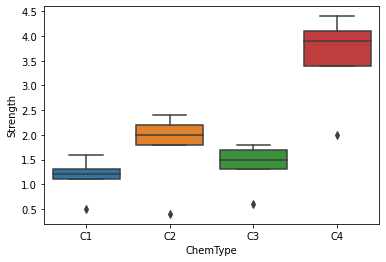

In [30]:
# box plot
from statsmodels.formula.api import ols # Require patsy version 5.0.1+
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='ChemType',y='Strength',data=strength_data);

In [34]:
# Manaul calculation for advance computation
# Compute variables
## จุดที่ต้องเปลี่ยนคือข้อมูลที่เอามาใส่นา ลองดูนะน้องๆ
## คำนวณมือ สำหรับใครที่งงตรงนี้อยู่ มีแบบสำเร็จข้างล่าง ไม่เป็นไรนะสู้ๆ
a = len(strength_data.ChemType.unique()) # 4 ตัว treatments factor ที่เราสนใจ
b = len(strength_data.Fabric.unique()) # 5 ตัว blocking 
total_y = sum(strength_data.Strength) #sum of strength รวบรวมความแกร่ง ผลรวมทั้งหมดของค่า Strength (Response)
SST = sum(strength_data.Strength**2) - (total_y**2)/(a*b) #เป็นสูตรนะน้องๆ จำ

# Compute SS terms
yi_dot = strength_data.groupby('ChemType').aggregate({'Strength':'sum'}).Strength
SSTr = sum(yi_dot**2)/b - (total_y**2)/(a*b)
ydot_j = strength_data.groupby('Fabric').aggregate({'Strength':'sum'}).Strength
SSB = sum(ydot_j**2)/a - (total_y**2)/(a*b)
SSE = SST - SSB - SSTr 
print("SST = {:.3f}, SSTr = {:.3f}, SSB = {:.3f}, SSE = {:.3f}".format(SST, SSTr, SSB, SSE))

# Compute MS Terms
MSTr = SSTr/(a-1)
MSB = SSB/(b-1)
MSE = SSE/((a-1)*(b-1))
F0 = MSTr/MSE
p_value = stats.f.sf(F0, a-1,(a-1)*(b-1))
print("MSTr = {0:.3f}, MSE = {1:.3f}, F0 = {2:.3f}, P-value = {3:.3f}".format(MSTr, MSE, F0, p_value))
# reject H0 : มีอย่างน้อย 1 treatment ที่แตกต่างจาก treatment อื่นๆ

SST = 25.688, SSTr = 18.044, SSB = 6.693, SSE = 0.951
MSTr = 6.015, MSE = 0.079, F0 = 75.895, P-value = 0.000


In [35]:
# software calculation
from statsmodels.formula.api import ols # Require patsy version 5.0.1+ 
from statsmodels.stats.anova import anova_lm

mod = ols('Strength ~ ChemType + Fabric', strength_data).fit()
anova_table = sm.stats.anova_lm(mod)
anova_table
# reject H0 : มีอย่างน้อย 1 treatment ที่แตกต่างจาก treatment อื่นๆ [Treatments factor (ChemType)]
# อย่าไปสนใจค่า p-value ตัว blocking นะน้องๆ [Fabric]

,df,sum_sq,mean_sq,F,PR(>F)
ChemType,3.0,18.044,6.014667,75.894848,4.518310e-08
Fabric,4.0,6.693,1.673250,21.113565,2.318913e-05
Residual,12.0,0.951,0.079250,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    C1     C2     0.62 0.5061 -0.6308 1.8708  False
    C1     C3     0.24    0.9 -1.0108 1.4908  False
    C1     C4     2.42  0.001  1.1692 3.6708   True
    C2     C3    -0.38  0.802 -1.6308 0.8708  False
    C2     C4      1.8  0.004  0.5492 3.0508   True
    C3     C4     2.18  0.001  0.9292 3.4308   True
---------------------------------------------------


C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


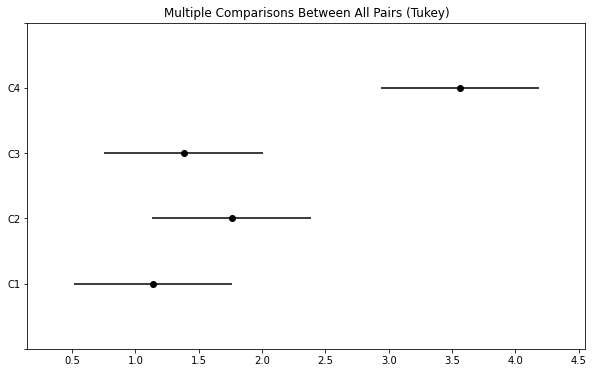

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# alpha = Family-wise error rate
result=pairwise_tukeyhsd(strength_data['Strength'],strength_data['ChemType'],alpha=0.05) # (Data[response],data[factor],alpha)
print(result)
result.plot_simultaneous();
# reject H0 : treatment คู่นั้นแตกต่างกัน

In [37]:
# อัตราส่วนระหว่าง ความแปรปรวนที่อธิบายไม่ได้ใน CRD กับ ความแปรปรวนที่อธิบายไม่ได้ใน RCBD
# ค่า E มากกว่า 1 :  ใช้ blocking varaible แล้วดีกว่า
# ค่า E ประมาณ 1 :  ถึงใช้ blocking varaible ก็ไม่ต่าง
# ค่า E น้อยกว่า 1 :  ไม่ควรใช้ blocking varaible 
# สู้ๆนะน้องๆครึ่งทางละ
a = len(strength_data.ChemType.unique())
b = len(strength_data.Fabric.unique())

E = (((b-1)*MSB) + (b*(a-1)*MSE))/((a*b-1)*MSE)

print('E = ', E)

E =  5.2344346671097375


2) Visualizing Interaction Assumption

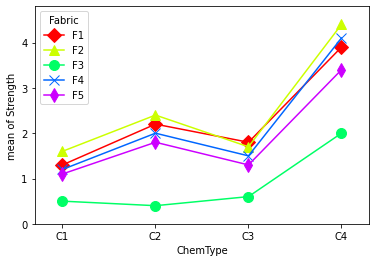

In [38]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(strength_data.ChemType, 
                       strength_data.Fabric, 
                       strength_data.Strength, 
                       markers=['D','^','o','x','d'], ms=10) 

# เส้นกราฟเรียงตัวค่อนข้างขนานกัน = less or no interaction between blocking and factor
# บางทีถ้าเธอใจเย็นๆและฟังฉันซักหน่อย : วิว UL

3) Normality Check Plotting function

In [39]:
def check_anova_normality(group, x):

    kws = dict(color='blue', marker='o', markersize=7, alpha=0.5)
    sns1_kws = dict(color='blue', marker='o', s=80, alpha=0.5)
    sns2_kws = dict(marker='o', s=8, alpha=0.5)

    T = len(x)
    
    fig = plt.figure(figsize=(10,8))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    #ax1.plot(x, color='blue', alpha=0.5, linestyle='--', marker='o', ms=4)
    n=len(x)
    sns.residplot(np.linspace(1,n,n), x, ax=ax1, scatter_kws=sns1_kws) # color='blue', ax=ax1, scatter_kws=sns1_kws)
    #sns.scatterplot(np.linspace(1,n,n), x, ax=ax1, **sns1_kws) 
    ax1.set_title('Sequence plot')
    
    # Scatter plot
    #ax2.scatter(x, x.shift(), alpha=0.5, color='red')
    #ax2.set_title(r'Scatter plot of $e_n$ vs $e_{n+1}$')
    
    # Residual groupplot
    resid_df = pd.DataFrame({'Group':group, 'Resid':x})
    sns.stripplot(x='Group', y='Resid', data=resid_df, ax=ax2, **sns2_kws) 
    ax2.set_title('Residuals by treatments')
    
    # Box plot
    #ax2.boxplot(x,showmeans=True)
    #ax2.set_title('Boxplot')

    # histogram plot
    sns.distplot(x, hist=True, kde=True, ax=ax3)
    ax3.set_title('Histogram')


    # qq plot
    sm.graphics.qqplot(x,line='q',ax=ax4, **kws)
    ax4.set_title('Q-Q plot')
    plt.tight_layout()
    
# residuals ทุก treatment มีการกระจายตัวแบบ normal distribution 
# และมีค่า variance ใกล้เคียงกันเนื่องจากค่า residuals กระจายตัวอยู่ในช่วงใกล้เคียงกัน

C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot

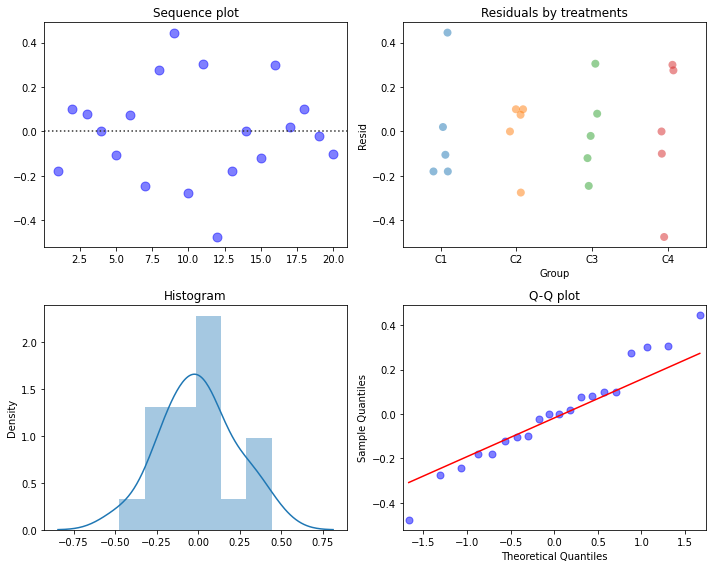

In [40]:
check_anova_normality(strength_data['ChemType'], mod.resid)

# residuals ทุก treatment มีการกระจายตัวแบบ normal distribution 
# และมีค่า variance ใกล้เคียงกันเนื่องจากค่า residuals กระจายตัวอยู่ในช่วงใกล้เคียงกัน

4) Friedman Test (RCBD non parametric)

Non-parametric blocking ค่าความแปรปรวน และ replicates ไม่เท่ากันในแต่ละ treatments

In [30]:
from scipy.stats import friedmanchisquare

y1=[1.3, 1.6, 0.5, 1.2, 1.1] #Treatment1
y2=[2.2, 2.4, 0.4, 2.0, 1.8] #Treatment2
y3=[1.8, 1.7, 0.6, 1.5, 1.3] #Treatment3
y4=[3.9, 4.4, 2.0, 4.1, 3.4] #Treatment4 4.1 3.4

stat, p = friedmanchisquare(y1, y2, y3, y4)
print('Test statistics = {:.2f}, p-value = {:.4f}'.format(stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('No effect (fail to reject H0)')
else:
  print('Effect observed (reject H0)')
# reject H0 : มีอย่างน้อย 1 treatment ที่มีค่า mean ที่แตกต่างจาก treatment อื่นๆ

Test statistics = 12.12, p-value = 0.0070
Effect observed (reject H0)


5) Latin square one-way ANOVA with two blocking

In [42]:
# import data method 1 Big brain AJ.Jo
p=5
reactiontime = [8,11,4,6,4,7,2,9,8,2,1,7,10,6,3,7,3,1,6,8,3,8,5,10,8]
batch = list('12345')*p
day = np.repeat(list('12345'), p)
ingredient = list('ACBDEBEACDDACEBCDEBAEBDAC')

df = pd.DataFrame({'ReactionTime': reactiontime,
                   'Batch': batch, 'Day': day, 'Ingredient': ingredient})
df

,ReactionTime,Batch,Day,Ingredient
0,8,1,1,A
1,11,2,1,C
2,4,3,1,B
3,6,4,1,D
4,4,5,1,E
5,7,1,2,B
6,2,2,2,E
7,9,3,2,A
8,8,4,2,C
9,2,5,2,D


In [43]:
# import data method 2 แนะนำ
ReactTime_data = pd.DataFrame({'ReactionTime': [8,7,1,7,3,11,2,7,3,8,4,9,10,1,5,6,8,6,6,10,4,2,3,8,8],
                         'Ingredient': ['A','B','D','C','E','C','E','A','D','B','B','A','C','E','D','D','C','E','B','A','E','D','B','A','C'],
                         'Bacth': np.repeat(['1','2','3','4','5'],5), 
                         'Day': ['1','2','3','4','5']*5})
ReactTime_data

,ReactionTime,Ingredient,Bacth,Day
0,8,A,1,1
1,7,B,1,2
2,1,D,1,3
3,7,C,1,4
4,3,E,1,5
5,11,C,2,1
6,2,E,2,2
7,7,A,2,3
8,3,D,2,4
9,8,B,2,5


In [44]:
# Big brain Aj.Jo แนะนำให้ใช้ ถ้าว่าง : ปั๊ม UL
# Manaul calculation
# Compute variables
# p = 5
# degree_of_freedom(p-1) = 4
# N = 25
total_y = sum(ReactTime_data.ReactionTime)
SST = sum(ReactTime_data.ReactionTime**2) - (total_y**2)/25

# Compute SS terms
y_dot_j_dot = ReactTime_data.groupby('Ingredient').aggregate({'ReactionTime':'sum'}).ReactionTime
SSTr = sum(y_dot_j_dot**2)/5 - (total_y**2)/25
y_i_dot_dot = ReactTime_data.groupby('Bacth').aggregate({'ReactionTime':'sum'}).ReactionTime
SSrow = sum(y_i_dot_dot**2)/5 - (total_y**2)/25
y_dot_dot_k = ReactTime_data.groupby('Day').aggregate({'ReactionTime':'sum'}).ReactionTime
SScol = sum(y_dot_dot_k**2)/5 - (total_y**2)/25
SSE = SST - SSTr - SSrow - SScol
print("SST = {:.3f}, SSTr = {:.3f}, SSrow = {:.3f}, SScol = {:.3f}, SSE = {:.3f}".format(SST, SSTr, SSrow, SScol, SSE))

# Compute MS Terms
MSTr = SSTr/4
MSRow = SSrow/4
MSCol = SScol/4
MSE = SSE/12 # (p-2)(p-1) = 3*4 = 12
F0 = MSTr/MSE
p_value = stats.f.sf(F0, 4,12)
print("MSTr = {0:.3f}, MSE = {1:.3f}, F0 = {2:.3f}, P-value = {3:.3f}".format(MSTr, MSE, F0, p_value))
# reject H0 : มีอย่างน้อย 1 treatment ที่มีค่า mean แตกต่างจาก treatment อื่นๆ

SST = 206.640, SSTr = 141.440, SSrow = 15.440, SScol = 12.240, SSE = 37.520
MSTr = 35.360, MSE = 3.127, F0 = 11.309, P-value = 0.000


In [45]:
alpha=0.05
crit_val = stats.f.isf(alpha, p-1, (p-2)*(p-1))
print("Critical value at {:.2f} = {:.2f}".format(alpha, crit_val))

Critical value at 0.05 = 3.26


In [46]:
# software calculation
# ง่าย ดีต่อใจ cr. ตาลือแนะนำมา
ReactionTime_model = ols('ReactionTime ~ Ingredient + Bacth + Day', data=ReactTime_data).fit()
ReactTime_data['resid'] = ReactionTime_model.resid
aov_table2 = sm.stats.anova_lm(ReactionTime_model, typ=1) 
aov_table2
# reject H0 : มีอย่างน้อย 1 treatment ที่มีค่า mean แตกต่างจาก treatment อื่นๆ

,df,sum_sq,mean_sq,F,PR(>F)
Ingredient,4.0,141.44,35.360000,11.309168,0.000488
Bacth,4.0,15.44,3.860000,1.234542,0.347618
Day,4.0,12.24,3.060000,0.978678,0.455014
Residual,12.0,37.52,3.126667,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1422 -6.2173  0.6173  False
     A      C      0.4    0.9 -3.0173  3.8173  False
     A      D     -5.0 0.0024 -8.4173 -1.5827   True
     A      E     -5.2 0.0016 -8.6173 -1.7827   True
     B      C      3.2 0.0734 -0.2173  6.6173  False
     B      D     -2.2 0.3362 -5.6173  1.2173  False
     B      E     -2.4 0.2579 -5.8173  1.0173  False
     C      D     -5.4 0.0011 -8.8173 -1.9827   True
     C      E     -5.6  0.001 -9.0173 -2.1827   True
     D      E     -0.2    0.9 -3.6173  3.2173  False
----------------------------------------------------


C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


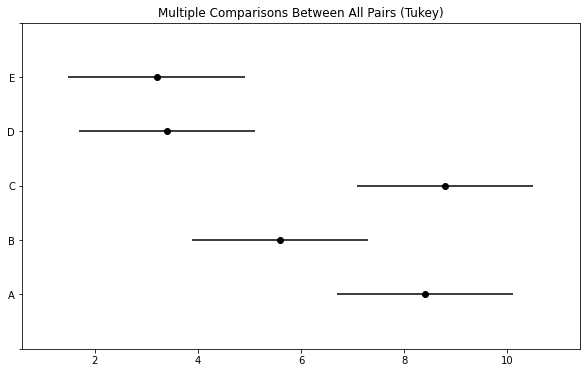

In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# alpha = Family-wise error rate
result=pairwise_tukeyhsd(ReactTime_data['ReactionTime'],ReactTime_data['Ingredient'],alpha=0.05)
print(result)
result.plot_simultaneous();
# reject H0 : treatment คู่นั้นมีค่า mean แตกต่างกัน

In [48]:
#อัตราส่วนระหว่าง ความแปรปรวนที่อธิบายไม่ได้ใน CRD กับ ความแปรปรวนที่อธิบายไม่ได้ใน RCBD two blocking
E1 = (MSRow+MSCol+(p-1)*MSE)/((p+1)*MSE) # variance^2 CRD/ variance^2 Latin

#อัตราส่วนระหว่าง ความแปรปรวนที่อธิบายไม่ได้ใน การทำ row blocking อย่างเดียว กับ ความแปรปรวนที่อธิบายไม่ได้ใน RCBD
E2 = (MSCol+(p-1)*MSE)/(p*MSE) # variance^2 row/ variance^2 latin

#อัตราส่วนระหว่าง ความแปรปรวนที่อธิบายไม่ได้ใน การทำ column blocking อย่างเดียว กับ ความแปรปรวนที่อธิบายไม่ได้ใน RCBD
E3 = (MSRow+(p-1)*MSE)/(p*MSE) # variance^2 col/ variance^2 latin

# ค่า E1 มากกว่า 1 :  latin square effective
# ค่า E2 มากกว่า 1 :  latin square ดีกว่า
# ค่า E3 มากกว่า 1 :  ใช้ Latin square แล้วดีกว่า

print('E1 = {:.2f}, E2 = {:.2f}, E3 = {:.2f}'.format(E1,E2,E3))
# Values of E's close to one indicate that blocking does not help much in this experiment.
# เพราะว่า วิวเก่งมาก

E1 = 1.04, E2 = 1.00, E3 = 1.05


4.Factorial design

In [49]:
import pandas as pd

battery_data = pd.read_excel('data/lect05-factorial.xlsx', sheet_name='Battery',header=0)
battery_data

,Lifetime,Material,Temp
0,130,M1,T015
1,155,M1,T015
2,74,M1,T015
3,180,M1,T015
4,34,M1,T070
5,40,M1,T070
6,80,M1,T070
7,75,M1,T070
8,20,M1,T125
9,70,M1,T125


In [50]:
missile_data = pd.read_excel('data/lect05-factorial.xlsx', 
                             sheet_name='Missile',header=0)
missile_data

,BurningRate,System,Propellant
0,34.0,S1,P1
1,32.7,S1,P1
2,30.1,S1,P2
3,32.8,S1,P2
4,29.8,S1,P3
5,26.7,S1,P3
6,29.0,S1,P4
7,28.9,S1,P4
8,32.0,S2,P1
9,33.2,S2,P1


1) two-way ANOVA F-test

In [51]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'Lifetime ~ Material + Temp + Material:Temp'
mdl = ols(formula, data=battery_data).fit()
aov_table = anova_lm(mdl, typ=1) 
aov_table
# if each case reject H0
# FactorA sig มีอย่างน้อย 1 treatment ของ FactorA ที่แตกต่างจาก treatment อื่นๆ
# FactorB sig มีอย่างน้อย 1 treatment ของ FactorB ที่แตกต่างจาก treatment อื่นๆ
# Interaction term sig FactorA กับ FactorB มี interaction กัน

,df,sum_sq,mean_sq,F,PR(>F)
Material,2.0,10683.722222,5341.861111,7.911372,1.976083e-03
Temp,2.0,39118.722222,19559.361111,28.967692,1.908596e-07
Material:Temp,4.0,9613.777778,2403.444444,3.559535,1.861117e-02
Residual,27.0,18230.750000,675.212963,NaN,NaN


In [52]:
formula = 'BurningRate ~ System + Propellant + System:Propellant'
mdl2 = ols(formula, data=missile_data).fit()
aov_table2 = anova_lm(mdl2, typ=1) 
aov_table2
# if each case reject H0
# FactorA sig มีอย่างน้อย 1 treatment ของ FactorA ที่แตกต่างจาก treatment อื่นๆ
# FactorB sig มีอย่างน้อย 1 treatment ของ FactorB ที่แตกต่างจาก treatment อื่นๆ
# Interaction term sig FactorA กับ FactorB มี interaction กัน

,df,sum_sq,mean_sq,F,PR(>F)
System,2.0,14.523333,7.261667,5.844400,0.016898
Propellant,3.0,40.081667,13.360556,10.752962,0.001020
System:Propellant,6.0,22.163333,3.693889,2.972949,0.051168
Residual,12.0,14.910000,1.242500,NaN,NaN


2) Interaction plot

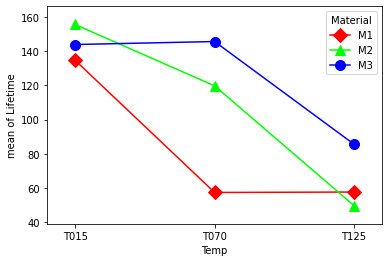

In [53]:
from statsmodels.graphics.factorplots import interaction_plot

# x axis = Temperature
# line gragh = Material
# y axis = Lifetime

fig = interaction_plot(battery_data.Temp, 
                       battery_data.Material, 
                       battery_data.Lifetime, 
                       markers=['D','^','o'], ms=10) 

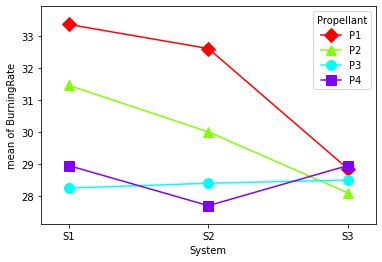

In [54]:
# x axis = System
# line gragh = Propellant
# y axis = BurningRate


fig = interaction_plot(missile_data.System, 
                       missile_data.Propellant, 
                       missile_data.BurningRate, 
                       markers=['D','^','o','s'], ms=10)

3) Model assumption check

C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


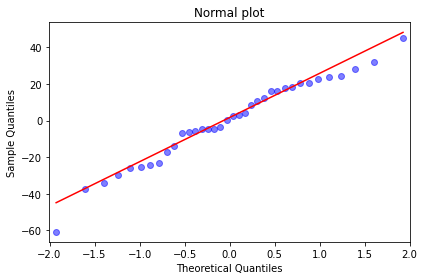

In [55]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.graphics.qqplot(mdl.resid,line='q',alpha=0.5,ms=6)
plt.title('Normal plot')
plt.tight_layout()
pass;
# residuals ทุก treatment มีการกระจายตัวแบบ normal distribution 

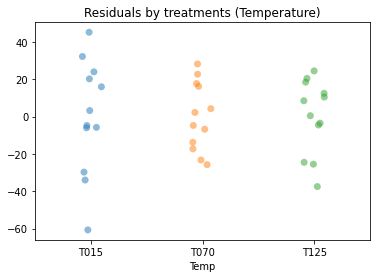

In [56]:
import seaborn as sns

#fig = plt.figure(figsize=(10,8))
    
#resid_df = pd.DataFrame({'Group':battery_data['Temp'], 'Resid':mdl.resid})
#sns.stripplot(x='Group', y='Resid', data=resid_df);
sns.stripplot(x=battery_data['Temp'], y=mdl.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (Temperature)')
pass;
# มีค่า variance ใกล้เคียงกันเนื่องจากค่า residuals กระจายตัวอยู่ในช่วงใกล้เคียงกัน

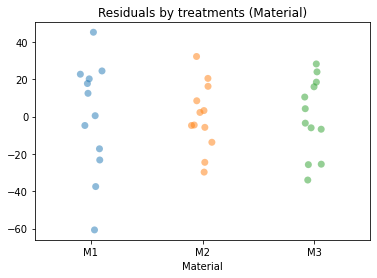

In [57]:
import seaborn as sns

#fig = plt.figure(figsize=(10,8))
    
#resid_df = pd.DataFrame({'Group':battery_data['Temp'], 'Resid':mdl.resid})
#sns.stripplot(x='Group', y='Resid', data=resid_df);
sns.stripplot(x=battery_data['Material'], y=mdl.resid, alpha=0.5, size=7);
plt.title('Residuals by treatments (Material)')
pass;
# มีค่า variance ใกล้เคียงกันเนื่องจากค่า residuals กระจายตัวอยู่ในช่วงใกล้เคียงกัน

4) Tukey HSD Test for specific factor level

In [58]:
from statsmodels.stats.libqsturng import qsturng

a = len(battery_data.Material.unique()) # จำนวน Treatments
f = mdl.df_resid # degree of freedom ERROR ab(n-1) 
print(a,f)
n = battery_data.groupby(['Material','Temp']).count().reset_index().iloc[0,-1] # จำนวน replicates ในแต่ละ treatments

3 27.0


In [59]:
# หาค่า margin of error
alpha=0.05
q_crit = qsturng(1-alpha, a, f)
margin_err = q_crit*np.sqrt(mdl.mse_resid/n)
print('q-critical value: {:.2f}'.format(q_crit)) #Tukey test critical-value
print('Margin error: {:.2f}'.format(margin_err))

q-critical value: 3.51
Margin error: 45.55


In [60]:
missile_data_fixS1 = missile_data.query("System=='S1'")
missile_data_fixS1

,BurningRate,System,Propellant
0,34.0,S1,P1
1,32.7,S1,P1
2,30.1,S1,P2
3,32.8,S1,P2
4,29.8,S1,P3
5,26.7,S1,P3
6,29.0,S1,P4
7,28.9,S1,P4


In [61]:
# หาค่า margin of error, group mean

a = len(missile_data_fixS1.Propellant.unique()) #จำนวน treatments 
f = mdl2.df_resid #ab(n-1)
n = missile_data_fixS1.groupby(['Propellant','System']).count().reset_index().iloc[0,-1] #จำนวน replicates

alpha= 0.05
q_crit = qsturng(1-alpha, a, f)
margin_err = q_crit*np.sqrt(mdl2.mse_resid/n)
print(a,f,n)
print('q-critical value: {:.2f}'.format(q_crit))
print('Margin error: {:.2f}'.format(margin_err))

group_mean = missile_data_fixS1.groupby('Propellant').aggregate({'BurningRate':'mean'}).BurningRate
print(group_mean)

4 12.0 2
q-critical value: 4.20
Margin error: 3.31
Propellant
P1    33.35
P2    31.45
P3    28.25
P4    28.95
Name: BurningRate, dtype: float64


Group mean จาก System : treatment S1

In [62]:
# tukey pairwise test

import itertools
allpairs=list(itertools.combinations(sorted(missile_data.Propellant.unique()),2)) #จับคู่ ทั้งหมดเลือก 2

tukey_df = pd.DataFrame(allpairs, columns={'group1','group2'})
tukey_df['meandiff'] = tukey_df.apply(lambda x: group_mean[x['group2']] - group_mean[x['group1']], axis=1) 
tukey_df['lower'] = tukey_df.apply(lambda x: x['meandiff'] - margin_err, axis=1) 
tukey_df['upper'] = tukey_df.apply(lambda x: x['meandiff'] + margin_err, axis=1) 
tukey_df['reject'] = tukey_df.apply(lambda x: 'False' if x['lower'] < 0 and x['upper'] > 0 else 'True', axis=1) 
tukey_df
### วิธีแปลผล ถ้า reject H0 : หมายความว่า ที่ System treatment S1 มี Propellant treatments ที่มีค่าเฉลี่ย (mean) แตกต่างกันในคู่นั้น
## ระวังจารจู๊กนา

,group1,group2,meandiff,lower,upper,reject
0,P1,P2,-1.9,-5.209748,1.409748,False
1,P1,P3,-5.1,-8.409748,-1.790252,True
2,P1,P4,-4.4,-7.709748,-1.090252,True
3,P2,P3,-3.2,-6.509748,0.109748,False
4,P2,P4,-2.5,-5.809748,0.809748,False
5,P3,P4,0.7,-2.609748,4.009748,False


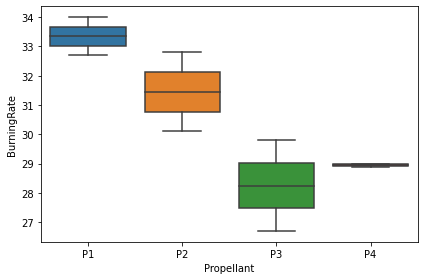

In [63]:
fig = plt.figure(figsize=(6,4));
sns.boxplot(x='Propellant',y='BurningRate',data=missile_data_fixS1)
plt.tight_layout()
pass;

5) Three-factor ANOVA

ทำคล้ายๆ Two-factor ละเอียดกว่าหน่อยนะ

In [64]:
softdrink_data = pd.read_excel('data/lect05-factorial.xlsx', sheet_name='Softdrink', header=0)
softdrink_data

,Filldeviation,Carbonation,Pressure,Linespeed
0,-3,10,25,200
1,-1,10,25,200
2,-1,10,25,250
3,0,10,25,250
4,-1,10,30,200
5,0,10,30,200
6,1,10,30,250
7,1,10,30,250
8,0,12,25,200
9,1,12,25,200


In [65]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'Filldeviation ~ C(Carbonation) + C(Pressure) + C(Linespeed) + C(Carbonation):C(Pressure) + \
C(Carbonation):C(Linespeed) + C(Pressure):C(Linespeed) + C(Carbonation):C(Pressure):C(Linespeed)'
mdl3 = ols(formula, data=softdrink_data).fit()
aov_table = anova_lm(mdl3) 
aov_table
## จบแล้ว สู้ๆนะ จาก วิว UL

,df,sum_sq,mean_sq,F,PR(>F)
C(Carbonation),2.0,252.750000,126.375000,178.411765,1.186249e-09
C(Pressure),1.0,45.375000,45.375000,64.058824,3.742257e-06
C(Linespeed),1.0,22.041667,22.041667,31.117647,1.202174e-04
C(Carbonation):C(Pressure),2.0,5.250000,2.625000,3.705882,5.580812e-02
C(Carbonation):C(Linespeed),2.0,0.583333,0.291667,0.411765,6.714939e-01
C(Pressure):C(Linespeed),1.0,1.041667,1.041667,1.470588,2.485867e-01
C(Carbonation):C(Pressure):C(Linespeed),2.0,1.083333,0.541667,0.764706,4.868711e-01
Residual,12.0,8.500000,0.708333,NaN,NaN


# วิวบอกว่าสู้ๆนะ